
# EDA 1.2.2 – Red Wine Quality (Matplotlib-only)

**Hướng dẫn chạy:**  
1) Đặt file dữ liệu ở: `data/winequality-red.csv` (tải từ Kaggle: *Red Wine Quality - Red Wine*).  
2) Chạy tuần tự các ô từ trên xuống dưới trong **JupyterLab/Jupyter Notebook/VS Code**.  
3) Mỗi biểu đồ nằm **một ô riêng**, dùng **matplotlib** (không seaborn), **không đặt màu thủ công**.

> Nếu bạn dùng Google Colab, chỉ cần upload `winequality-red.csv` lên và sửa đường dẫn cho phù hợp.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# nếu CSV nằm cùng thư mục với notebook
df = pd.read_csv('winequality-red.csv', sep=';')  # dữ liệu rượu dùng dấu ; làm phân tách
print('Kích thước dữ liệu:', df.shape)
df.head()

Kích thước dữ liệu: (1599, 1)


,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [4]:

# Thông tin chung
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [5]:

# Thống kê mô tả
df.describe()


,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
count,1599
unique,1359
top,"7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.9953799999..."
freq,4


In [11]:
import pandas as pd

# Đọc lại dữ liệu, lần này cho Pandas tự nhận dạng dấu phân tách
df = pd.read_csv('winequality-red.csv', sep=None, engine='python', encoding='utf-8-sig')

# Làm sạch tên cột
df.columns = (df.columns
              .str.replace('\ufeff','', regex=False)
              .str.strip()
              .str.lower())

print('Tên cột:', df.columns.tolist())
print('Kích thước dữ liệu:', df.shape)

Tên cột: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
Kích thước dữ liệu: (1599, 12)


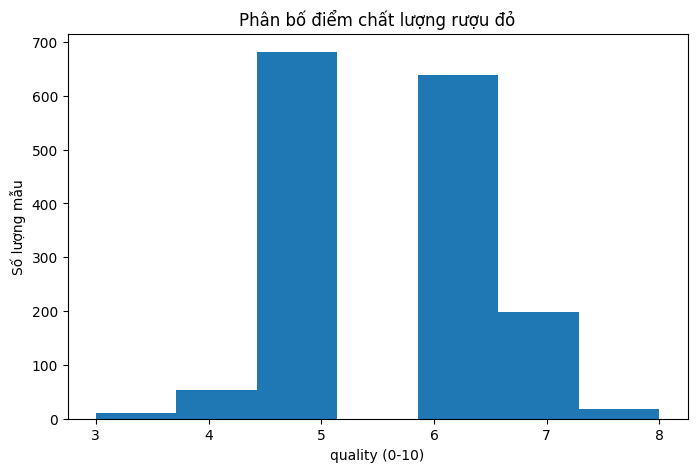

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['quality'], bins=7)
plt.title('Phân bố điểm chất lượng rượu đỏ')
plt.xlabel('quality (0-10)')
plt.ylabel('Số lượng mẫu')
plt.show()


In [15]:
import pandas as pd

# Cách 1 (khuyên dùng): tự phát hiện delimiter
df = pd.read_csv("winequality-red.csv", sep=None, engine="python")

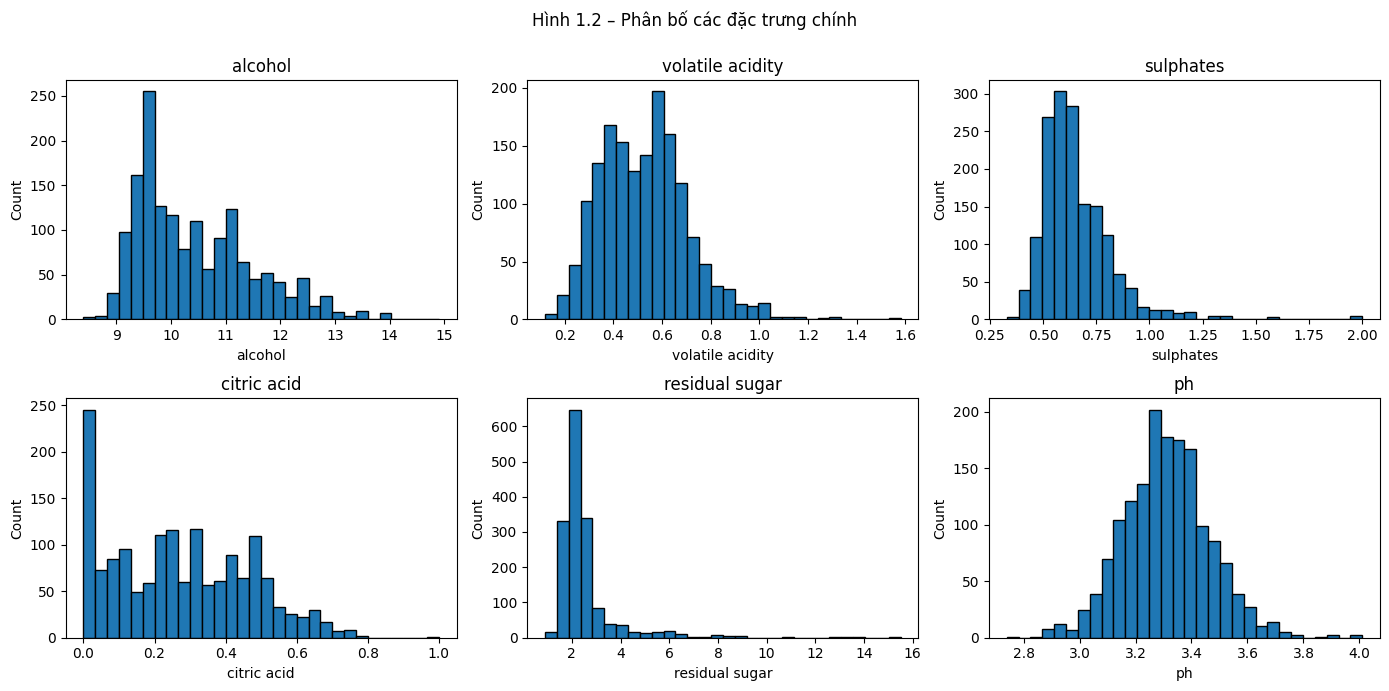

In [11]:
import matplotlib.pyplot as plt

features = ["alcohol","volatile acidity","sulphates","citric acid","residual sugar","ph"]

fig, ax = plt.subplots(2, 3, figsize=(14,7)); ax = ax.ravel()
for i, c in enumerate(features):
    ax[i].hist(df[c].dropna(), bins=30, edgecolor="black")
    ax[i].set_title(c); ax[i].set_xlabel(c); ax[i].set_ylabel("Count")
for j in range(len(features), len(ax)):
    fig.delaxes(ax[j])

fig.suptitle("Hình 1.2 – Phân bố các đặc trưng chính")
plt.tight_layout(); plt.subplots_adjust(top=0.88)
plt.savefig("Hinh_1_2_hist_features.png", dpi=300, bbox_inches="tight")
plt.show()


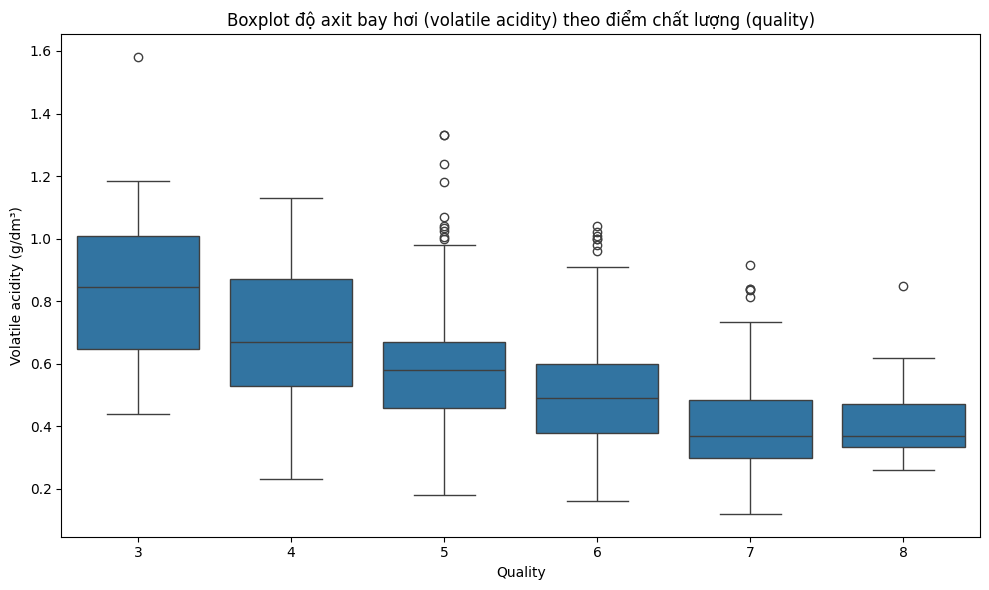

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="quality", y="volatile acidity")
plt.title("Boxplot độ axit bay hơi (volatile acidity) theo điểm chất lượng (quality)")
plt.xlabel("Quality")
plt.ylabel("Volatile acidity (g/dm³)")
plt.tight_layout()
plt.savefig("Hinh_1_4_volatile_quality.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_1557/2299354414.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df['quality'].unique()))


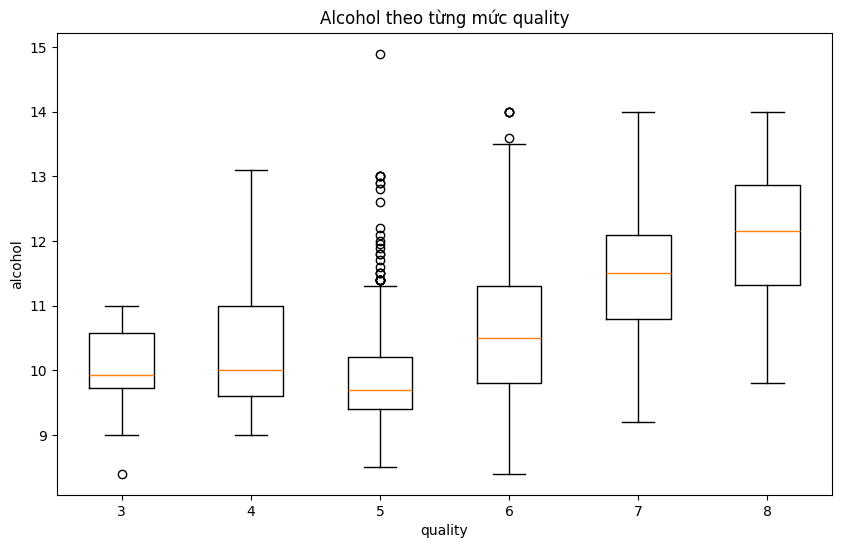

In [16]:

# Boxplot độ cồn theo từng mức quality
# Chuẩn bị dữ liệu theo nhóm
groups = [df[df['quality']==q]['alcohol'].values for q in sorted(df['quality'].unique())]

plt.figure(figsize=(10,6))
plt.boxplot(groups, labels=sorted(df['quality'].unique()))
plt.title('Alcohol theo từng mức quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


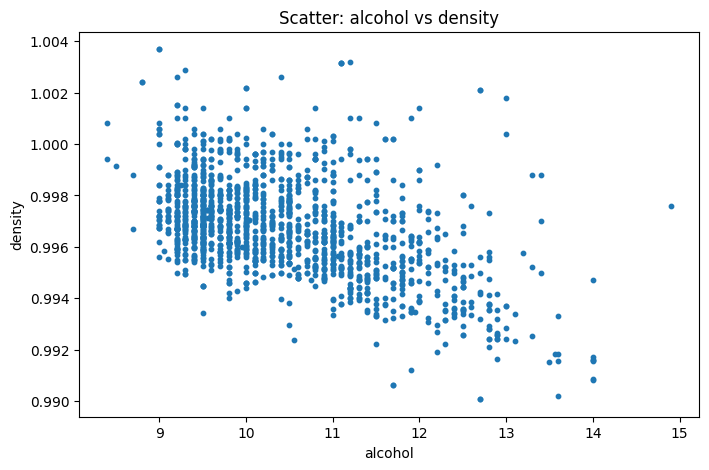

In [13]:

# Quan hệ giữa alcohol và density
plt.figure(figsize=(8,5))
plt.scatter(df['alcohol'], df['density'], s=10)
plt.title('Scatter: alcohol vs density')
plt.xlabel('alcohol')
plt.ylabel('density')
plt.show()


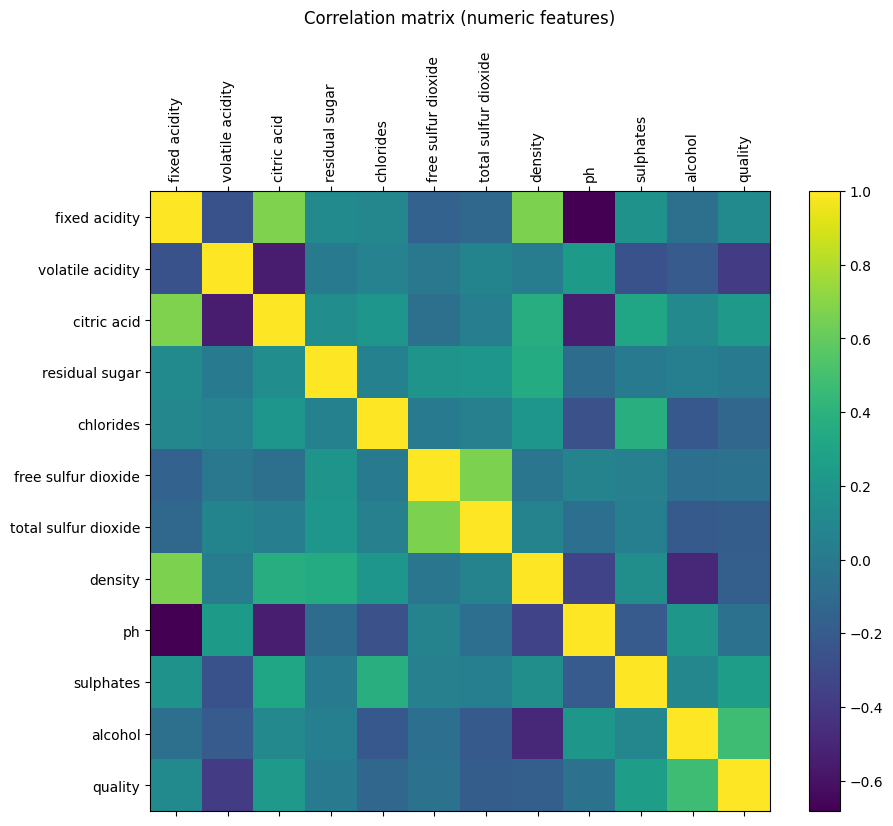

In [14]:

# Ma trận tương quan (dùng matshow để không phụ thuộc seaborn)
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=1)
plt.title('Correlation matrix (numeric features)', pad=20)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()
